# Lane Segmentation Pipeline

In [26]:
import numpy as np
import cv2
import segment_image as seg
from ipm import inverse_perspective_mapping
import matplotlib.pyplot as plt
from ipywidgets import interact, interactive, fixed
import glob

%matplotlib inline

# Read an image

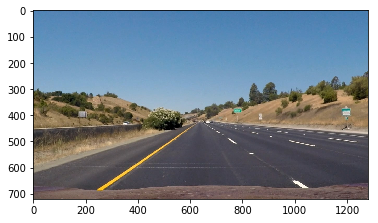

In [4]:
# Read an image with straight lines
img = cv2.imread('test_images/straight_lines1.jpg')

# Display the image
plt.imshow(cv2.cvtColor(img,cv2.COLOR_BGR2RGB))

# Transform image

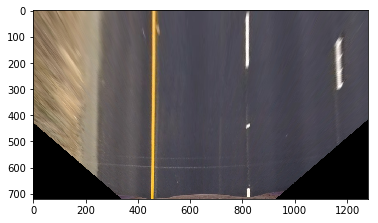

In [7]:
# Transform image to remove perspective distortion
ipm_img = inverse_perspective_mapping(img)

# Display transformed image
plt.imshow(cv2.cvtColor(ipm_img, cv2.COLOR_BGR2RGB))

# Experiment with Sobel absolute gradient threshold

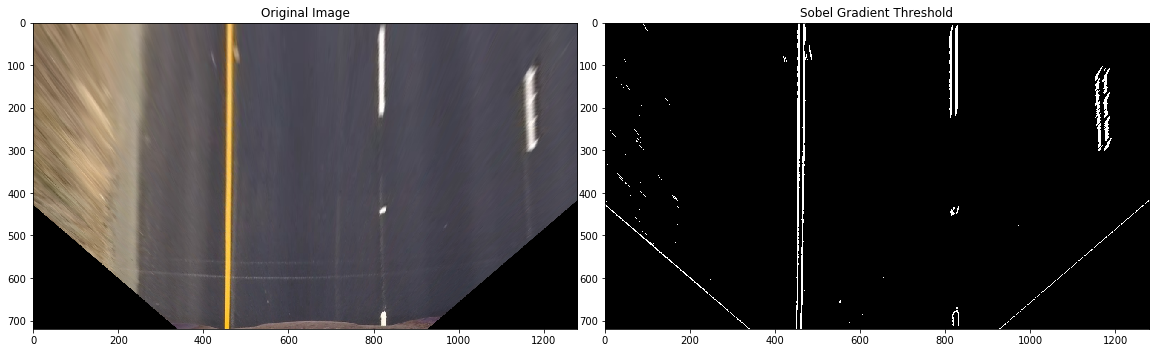

In [13]:
def update_sobel_abs(min_thresh, max_thresh):
    sobel_abs = seg.abs_sobel_thresh(ipm_img, 'x', min_thresh, max_thresh)

    f, (ax1, ax2) = plt.subplots(1, 2, figsize=(20,10))
    f.subplots_adjust(hspace=.2, wspace=.05)
    ax1.imshow(cv2.cvtColor(ipm_img, cv2.COLOR_BGR2RGB))
    ax1.set_title('Original Image')
    ax2.imshow(sobel_abs, cmap='gray')
    ax2.set_title('Sobel Absolute Threshold')
    
interact(update_sobel_abs, min_thresh=(0,255), max_thresh=(0,255)) 


# Experiment with Sobel magnitude threshold

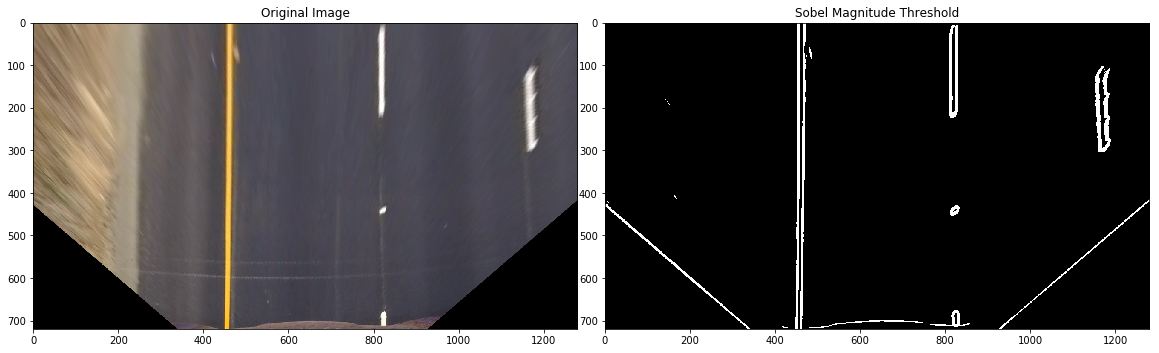

In [16]:
def update_sobel_mag(kernel_size, min_thresh, max_thresh):
    sobel_mag = seg.mag_thresh(ipm_img, kernel_size, (min_thresh, max_thresh))

    f, (ax1, ax2) = plt.subplots(1, 2, figsize=(20,10))
    f.subplots_adjust(hspace=.2, wspace=.05)
    ax1.imshow(cv2.cvtColor(ipm_img, cv2.COLOR_BGR2RGB))
    ax1.set_title('Original Image')
    ax2.imshow(sobel_mag, cmap='gray')
    ax2.set_title('Sobel Magnitude Threshold')

interact(update_sobel_mag, kernel_size=(1,31,2), min_thresh=(0,255), max_thresh=(0,255))

# Experiment with Sobel direction threshold

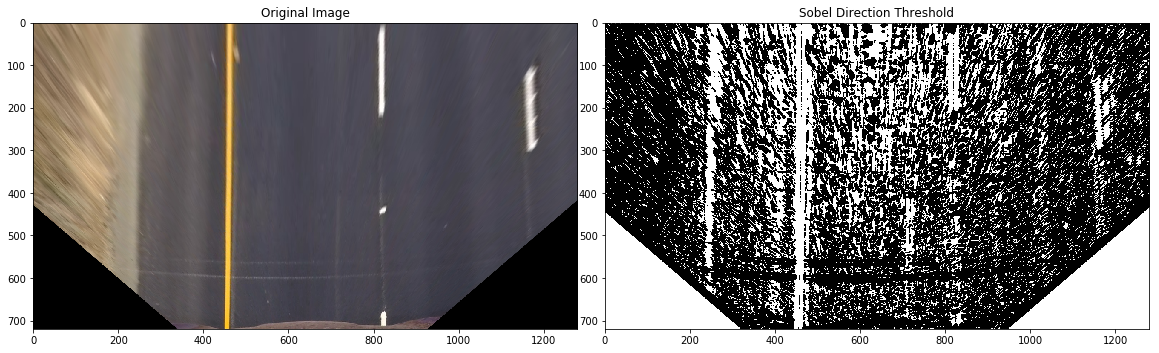

In [33]:
def update_sobel_dir(kernel_size, min_thresh, max_thresh):
    sobel_dir = seg.dir_threshold(ipm_img, kernel_size, (min_thresh, max_thresh))
    
    f, (ax1, ax2) = plt.subplots(1, 2, figsize=(20,10))
    f.subplots_adjust(hspace=.2, wspace=.05)
    ax1.imshow(cv2.cvtColor(ipm_img, cv2.COLOR_BGR2RGB))
    ax1.set_title('Original Image')
    ax2.imshow(sobel_dir, cmap='gray')
    ax2.set_title('Sobel Direction Threshold')

interact(update_sobel_dir, kernel_size=(1,31,2),min_thresh=(0, np.pi/2),max_thresh=(0, np.pi/2))

# Experiment with HSL threshold

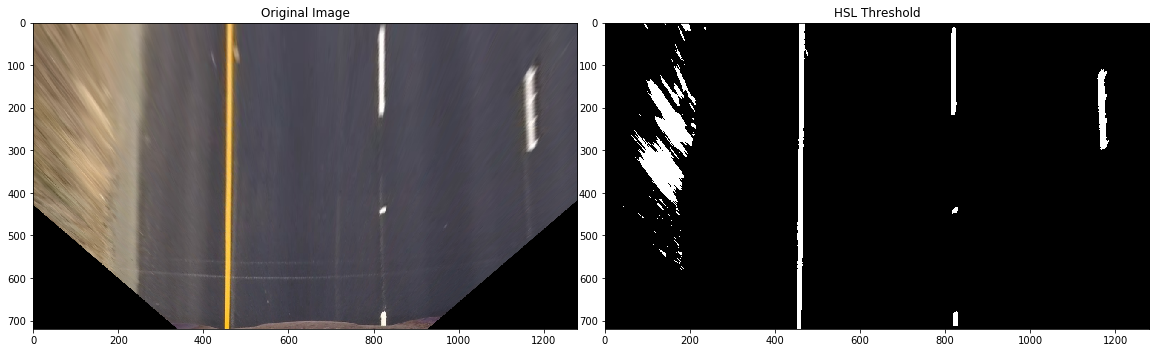

In [18]:
def update_color(min_thresh, max_thresh):
    thresh_img = seg.hls_select(ipm_img, (min_thresh,max_thresh))
    
    f, (ax1, ax2) = plt.subplots(1, 2, figsize=(20,10))
    f.subplots_adjust(hspace=.2, wspace=.05)
    ax1.imshow(cv2.cvtColor(ipm_img, cv2.COLOR_BGR2RGB))
    ax1.set_title('Original Image')
    ax2.imshow(thresh_img, cmap='gray')
    ax2.set_title('HSL Threshold')

interact(update_color, min_thresh=(0,255), max_thresh=(0,255))

# Select combined thresholds

Text(0.5,1,'Combined Threshold')

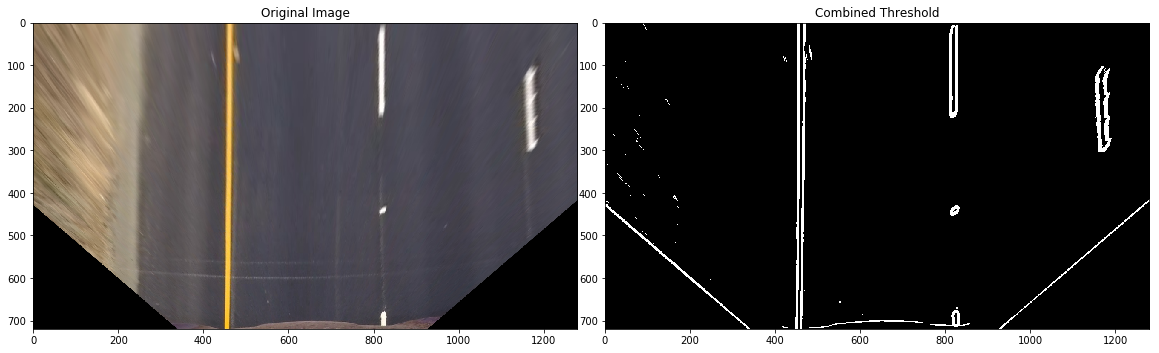

In [36]:
def segmentation_pipeline(ipm_img):
    # Compute individual thresholded images
    sobel_abs = seg.abs_sobel_thresh(ipm_img, 'x', 30, 255)
    sobel_mag = seg.mag_thresh(ipm_img, 15, (58, 255))
    sobel_dir = seg.dir_threshold(ipm_img, 15, (0,0.2))
    color_hsl = seg.hls_select(ipm_img, (180,255))

    # Compute combined threshold
    segmented_img = np.zeros_like(sobel_abs)
    segmented_img[((sobel_abs==1) | (sobel_mag==1)) | ((color_hsl==1) & (sobel_dir==1))] = 1
    return segmented_img

segmented_img = segmentation_pipeline(ipm_img)

# Display
f, (ax1, ax2) = plt.subplots(1, 2, figsize=(20,10))
f.subplots_adjust(hspace = .2, wspace=.05)
ax1.imshow(cv2.cvtColor(ipm_img, cv2.COLOR_BGR2RGB))
ax1.set_title('Original Image')
ax2.imshow(segmented_img, cmap='gray')
ax2.set_title('Combined Threshold')

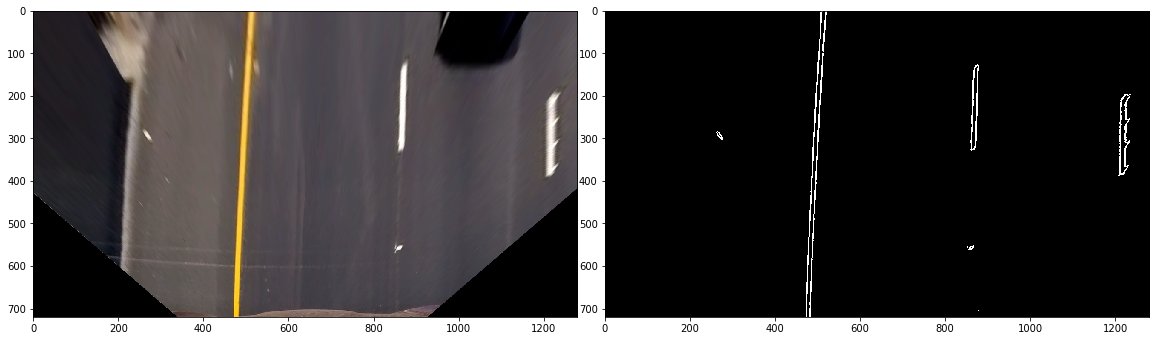

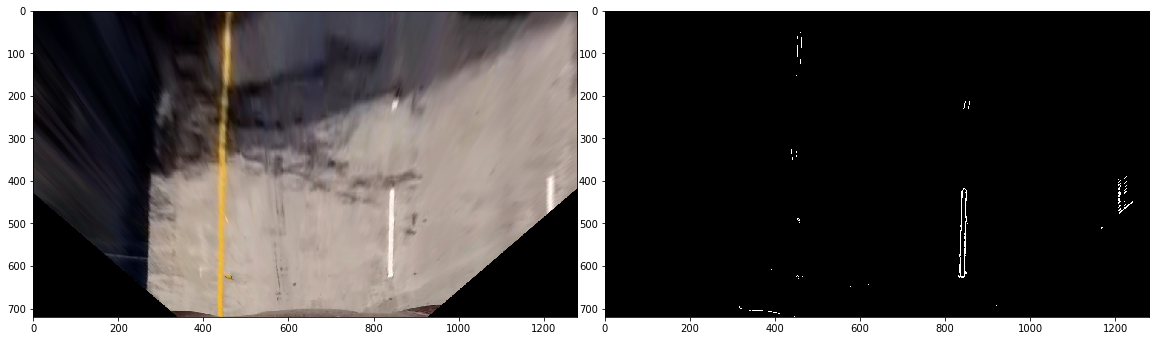

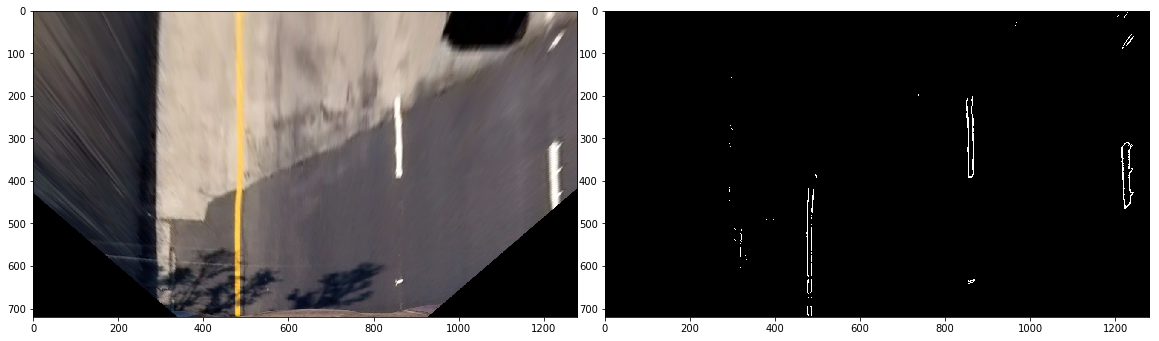

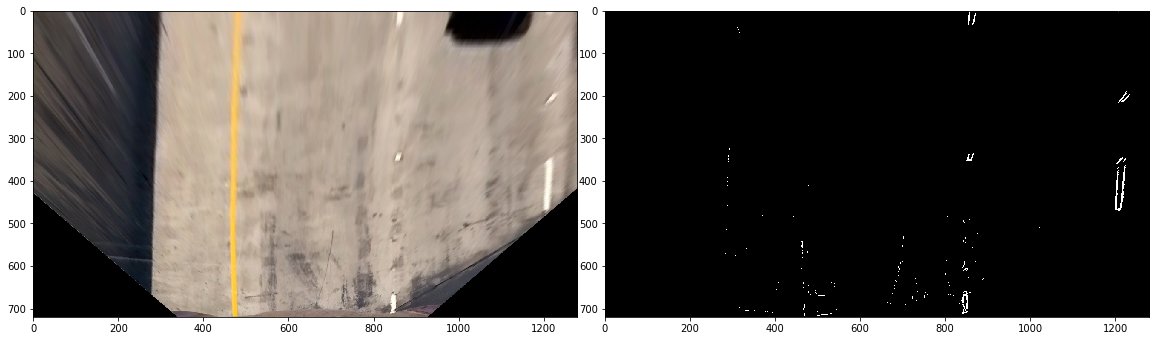

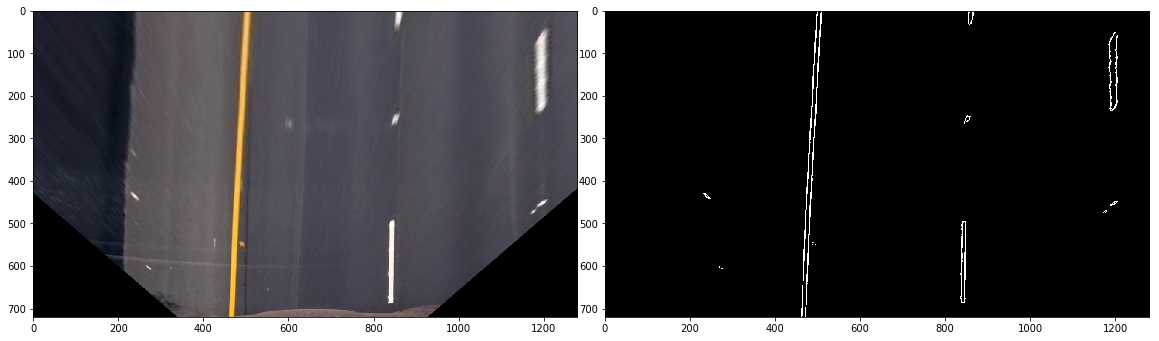

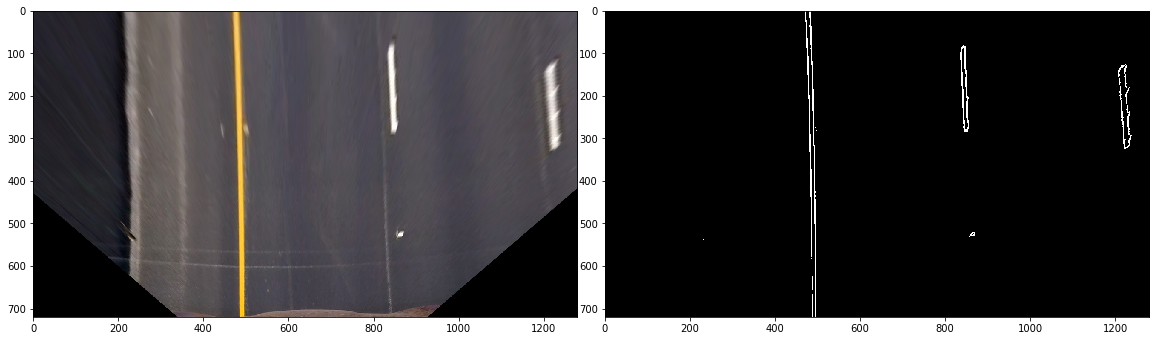

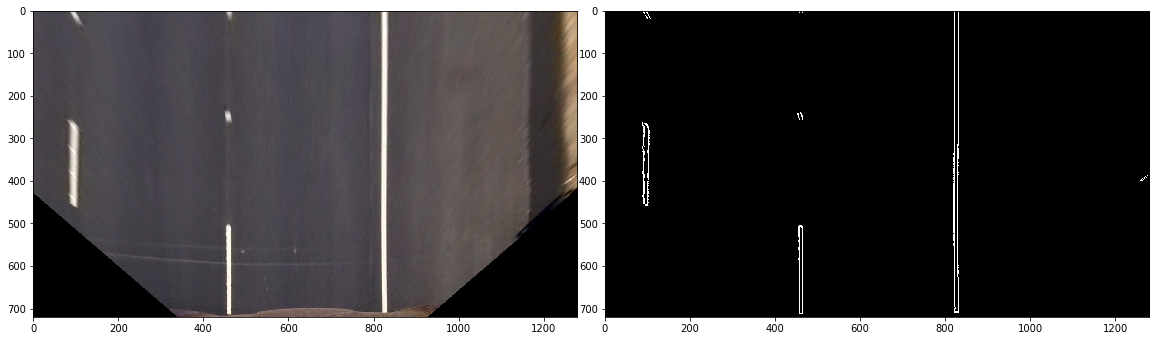

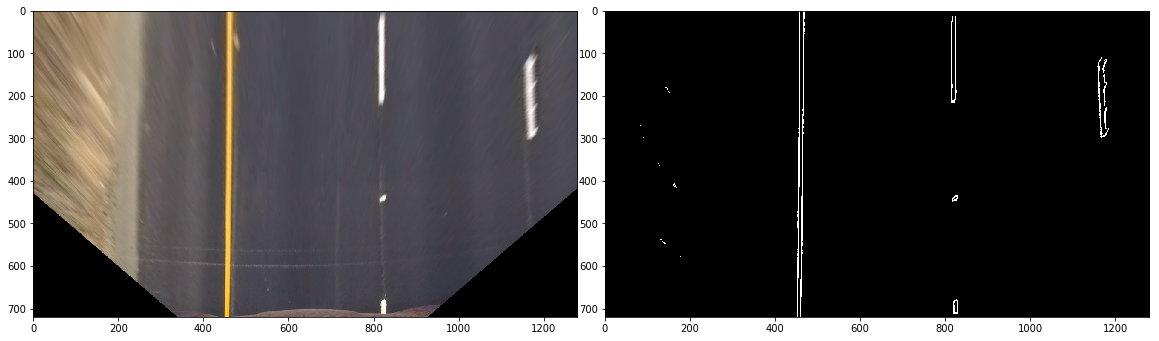

In [30]:
dir_name = 'test_images/'
items = glob.glob('./test_images/*.jpg')

for image_name in items:
    
    # Read image
    img = cv2.imread(image_name)
    
    # Warp image
    ipm_img = inverse_perspective_mapping(img)
    
    # Segment lane lines
    seg_img = segmentation_pipeline(ipm_img)
    
    # Plot warped image
    f, (ax1, ax2) = plt.subplots(1, 2, figsize=(20,10))
    f.subplots_adjust(hspace = .2, wspace=.05)
    
    ax1.imshow(cv2.cvtColor(ipm_img, cv2.COLOR_BGR2RGB))
    
    # Plot segmented lane lines
    ax2.imshow(seg_img, cmap='gray')
    
    